**Load the Titanic dataset**

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* Perform Below Visualizations

> 1.   Univariate Analysis
2.   Bi - Variate Analysis
3.   Multi - Variate Analysis

Univariate Analysis 



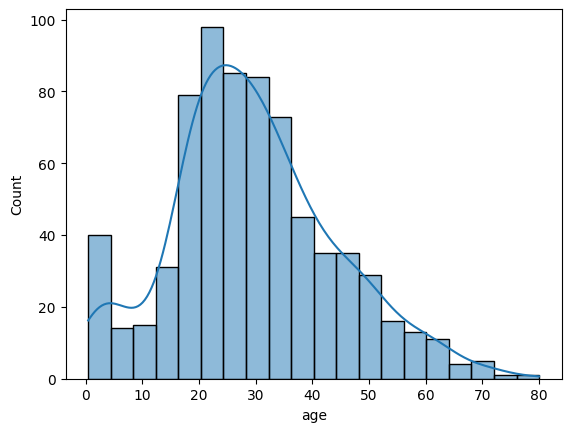

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
print("Univariate Analysis \n")
sns.histplot(df['age'].dropna(), kde=True)
plt.show()

Bivariate Analysis 



<Axes: xlabel='age', ylabel='fare'>

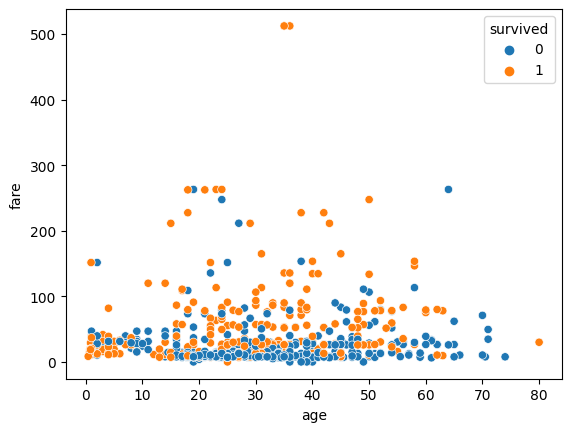

In [ ]:
# Bivariate Analysis
print("Bivariate Analysis \n")
sns.scatterplot(x='age', y='fare', hue='survived', data=df)  # Example: Scatterplot of Age vs. Fare

Multivariate Analysis 



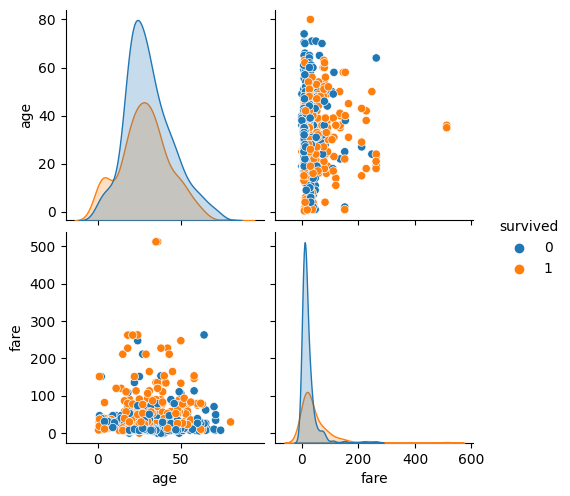

In [ ]:
# Multivariate Analysis
print("Multivariate Analysis \n")
sns.pairplot(df[['age', 'fare', 'survived', 'sex']], hue='survived')  # Example: Pairplot of selected variables


* Perform descriptive statistics on the dataset

In [ ]:
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


 *  Handle the Missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Filling missing values in 'Age' column with mean and same with other columns also
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

*  Find the outliers and replace the outliers

<Axes: >

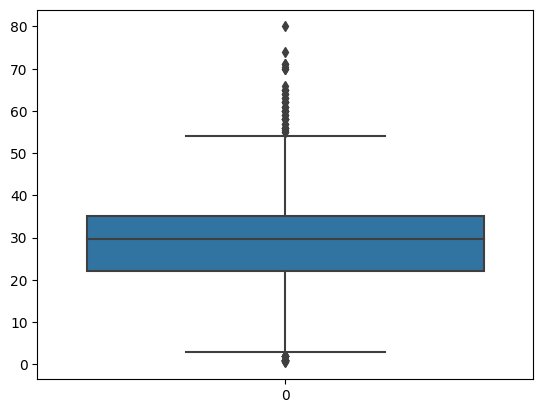

In [ ]:
sns.boxplot(df["age"])

<Axes: >

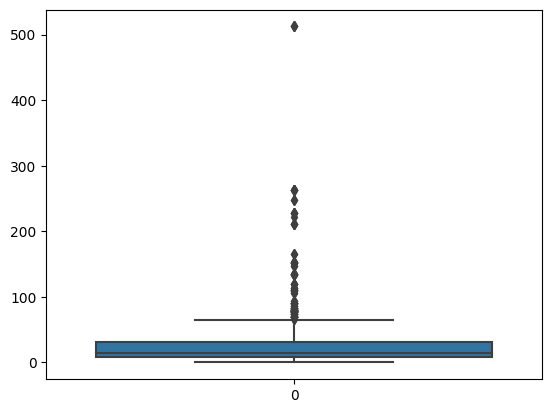

In [ ]:
sns.boxplot(df["fare"])

In [ ]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

    return ls

index_list = []
for feature in ["fare"]:
    index_list.extend(outliers(df,feature))

index_list

[1,
 27,
 31,
 34,
 52,
 61,
 62,
 72,
 88,
 102,
 118,
 120,
 124,
 139,
 151,
 159,
 180,
 195,
 201,
 215,
 218,
 224,
 230,
 245,
 256,
 257,
 258,
 262,
 268,
 269,
 275,
 290,
 291,
 297,
 299,
 305,
 306,
 307,
 310,
 311,
 318,
 319,
 324,
 325,
 332,
 334,
 336,
 337,
 341,
 366,
 369,
 373,
 375,
 377,
 380,
 385,
 390,
 393,
 412,
 435,
 438,
 445,
 453,
 484,
 486,
 496,
 498,
 504,
 505,
 520,
 527,
 537,
 540,
 544,
 550,
 557,
 558,
 581,
 585,
 587,
 591,
 609,
 627,
 641,
 645,
 655,
 659,
 660,
 665,
 679,
 681,
 689,
 698,
 700,
 708,
 716,
 730,
 737,
 741,
 742,
 745,
 759,
 763,
 765,
 779,
 789,
 792,
 802,
 820,
 829,
 835,
 846,
 849,
 856,
 863,
 879]

In [ ]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df = remove(df, index_list)

<Axes: >

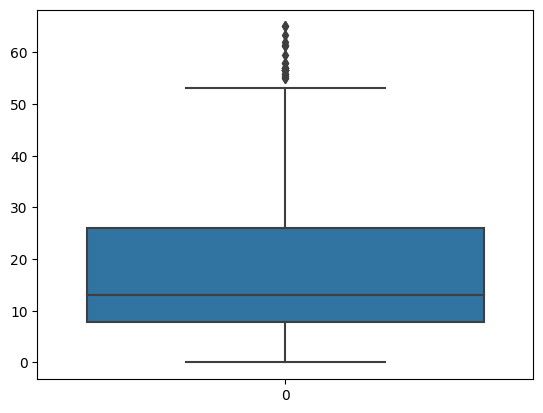

In [ ]:
sns.boxplot(df["fare"])

* Check for Categorical columns and perform encoding

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.sex = le.fit_transform(df["sex"])
df.embarked = le.fit_transform(df["embarked"])
df.who = le.fit_transform(df["who"])
df.adult_male = le.fit_transform(df.adult_male)
df.deck = le.fit_transform(df.deck)
df.embark_town = le.fit_transform(df.embark_town)
df.alive = le.fit_transform(df.alive)
df.alone = le.fit_transform(df.alone)
df["class"] = le.fit_transform(df["class"])


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,2,0,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,2,0,1
5,0,3,1,29.699118,0,0,8.4583,1,2,1,1,2,1,0,1


* Split the data into dependent and independent variables.


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [ ]:
print(x)

     pclass  sex        age  sibsp  parch     fare  embarked  class  who  \
0         3    1  22.000000      1      0   7.2500         2      2    1   
2         3    0  26.000000      0      0   7.9250         2      2    2   
3         1    0  35.000000      1      0  53.1000         2      0    2   
4         3    1  35.000000      0      0   8.0500         2      2    1   
5         3    1  29.699118      0      0   8.4583         1      2    1   
..      ...  ...        ...    ...    ...      ...       ...    ...  ...   
886       2    1  27.000000      0      0  13.0000         2      1    1   
887       1    0  19.000000      0      0  30.0000         2      0    2   
888       3    0  29.699118      1      2  23.4500         2      2    2   
889       1    1  26.000000      0      0  30.0000         0      0    1   
890       3    1  32.000000      0      0   7.7500         1      2    1   

     adult_male  deck  embark_town  alive  alone  
0             1     2            2  

In [ ]:
print(y)

     survived
0           0
2           1
3           1
4           0
5           0
..        ...
886         0
887         1
888         0
889         1
890         0

[775 rows x 1 columns]


* Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

* Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

[[ 0.70852824 -1.4752049  -1.5740909  ...  0.53978069 -0.71670906
  -1.35987672]
 [ 0.70852824  0.67787193  0.04660583 ...  0.53978069 -0.71670906
   0.73536077]
 [ 0.70852824  0.67787193 -0.55621865 ... -2.18549641 -0.71670906
   0.73536077]
 ...
 [-0.65402607  0.67787193  0.07016428 ... -2.18549641 -0.71670906
  -1.35987672]
 [ 0.70852824 -1.4752049   0.04660583 ... -0.82285786 -0.71670906
   0.73536077]
 [ 0.70852824  0.67787193 -0.55621865 ...  0.53978069 -0.71670906
   0.73536077]]
